# Assignment 2 Brief 

## Deadline: Tuesday, December 3, 2019 at 14:00 hrs

## Number of marks available: 20

## Scope: Sessions 6 to 9

## 1. Instructions
### How and what to submit

A. Submit a Jupyter Notebook named COM4509-6509_Assignment_2_UCard_XXXXXXXXX.ipynb where XXXXXXXXX refers to your UCard number.

B. Upload the notebook file to MOLE before the deadline above.

C. **NO DATA UPLOAD**: Please do not upload the data files used. We have a copy already. 


### Assessment Criteria 

* Being able to manipulate a dataset by generating sythetic data and extracting a particular subset. 

* Being able to build and train different machine learning models with tunable hyperparameters to optimise given evaluation metric.

* Being able to compare different machine learning models and explain interesting results observed. 

* Being able to follow examples in the lab and write code without the help of starter code.


### Late submissions

We follow Department's guidelines about late submissions, i.e., a deduction of 5% of the mark each working day the work is late after the deadline. NO late submission will be marked one week after the deadline because we will release a solution by then. Please read [this link](https://sites.google.com/sheffield.ac.uk/compgtstudenthandbook/menu/assessment/late-submission?pli=1&authuser=1). 

### Use of unfair means 

**"Any form of unfair means is treated as a serious academic offence and action may be taken under the Discipline Regulations."** (from the MSc Handbook). Please carefully read [this link](https://sites.google.com/sheffield.ac.uk/compgtstudenthandbook/menu/referencing-unfair-means?pli=1&authuser=1) on what constitutes Unfair Means if not sure.

# 2. Image classification and denoising

### The CIFAR-10 dataset
In this assignment, we will work on the [**CIFAR-10 dataset**](https://www.cs.toronto.edu/~kriz/cifar.html) collected by Alex Krizhevsky, Vinod Nair, and Geoffrey Hinton from the University of Toronto.  This dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. Each image is a 3-channel colour images of 32x32 pixels in size. There are 50000 training images and 10000 test images. 

			
### Question 1: Data loading and manipulation (4 marks)

1a. **Download** both the training and test data of the CIFAR-10 dataset, e.g., by following the [pytorch CIFAR10 tutorial](https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html). You can also download via other ways if you prefer.

1b. **Add random noise** to all training and test data to generate noisy dataset, e.g., by `torch.randn()`, with a scaling  factor `scale`, e.g., original image `+ scale * torch.randn()`, and **normalise/standardise** the pixel values to the **original range**, e.g.,  using `np.clip()`. You may choose any `scale` value between 0.2 and 0.5. 

**Note: Before generating the random noise, you MUST set the random seed to your UCard number XXXXXXXXX for reproducibility, e.g., using `torch.manual_seed()`. This seed needs to be used for all remaining code if there is randomness, for reproducibility.**

1c. **Extract a subset** with only two classes: **Cat** and **Dog** and name it starting with **CatDog**.        

1d. Show 10 pairs of original and noisy images of cats and 10 pairs of original and noisy images of dogs.

#### Question 1 Answer

In [1]:
# Write the code for your answer here. You can use multiple cells to improve readability.
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA

In [2]:
# 1a.Download both the training and test data of the CIFAR-10 dataset
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

100.0%

Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


In [3]:
# 1b. Add random noise to all training and test data
Noisy_trainset = []
Noisy_testset = []
scale = 0.2
torch.manual_seed(1718979)
for images,labels in trainset:
    images = images + scale * torch.randn(3,32,32)
    torch.clamp(images, -1, 1, out=images)
    Noisy_trainset.append((images,labels))
for images,labels in testset:
    images = images + scale * torch.randn(3,32,32)
    torch.clamp(images, -1, 1, out=images)
    Noisy_testset.append((images,labels))

In [4]:
# 1c.Extract a subset with only two classes: Cat and Dog and name it starting with CatDog.
CatDog = []
for images,labels in trainset:
    if labels == 3 or labels == 5:
        CatDog.append((images,labels))

CatDog_test = []
for images,labels in testset:
    if labels == 3 or labels == 5:
        CatDog_test.append((images,labels))


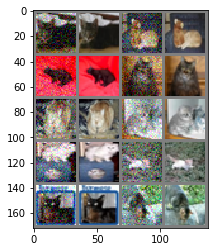

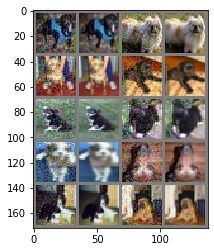

In [5]:
# 1d. Show 10 pairs of original and noisy images of cats and 10 pairs of original and noisy images of dogs.

def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

cats_Noisy = []
count = 0
for image,labels in Noisy_trainset:
    if labels == 3:
        cats_Noisy.append(image)
        count += 1
        if count==10:
            break;

cats = []
count = 0
for images,labels in CatDog:
    if labels == 3:
        cats.append(images)
        count += 1
        if count==10:
            break;


# Show 10 pairs of original and noisy images of cats
length = 20
cat_pairs = [0]*length
for i,image in enumerate(cats_Noisy):
    cat_pairs[i*2] = image
for i,image in enumerate(cats):
    cat_pairs[i*2+1] = image 
    
imshow(torchvision.utils.make_grid(cat_pairs, nrow = 4))    
    
dogs_Noisy = []
count = 0
for image,labels in Noisy_trainset:
    if labels == 5:
        dogs_Noisy.append(image)
        count += 1
        if count==10:
            break;

dogs = []
count = 0
for images,labels in CatDog:
    if labels == 5:
        dogs.append(images)
        count += 1
        if count==10:
            break;


# Show 10 pairs of original and noisy images of dogs    
dogs_pairs = [0]*length
for i,image in enumerate(dogs_Noisy):
    dogs_pairs[i*2] = image
for i,image in enumerate(dogs):
    dogs_pairs[i*2+1] = image 
imshow(torchvision.utils.make_grid(dogs_pairs, nrow = 4)) 
    
    

### Question 2: Dimensionality reduction, binary classification, and evaluation (6 marks)

This question uses the **CatDog** subset **with no noise added**.

#### Training

2a. Apply PCA on the training set to reduce the dimensionality. You need to study **at least seven** different values ($k_1, k_2, ..., k_7$) for the reduced dimensionality. **Explain** your choice.

2b. Train **eight** Naive Bayes Classifiers (NBC): one on the original features (raw pixels), and seven on PCA features with seven different dimensions in 2a, i.e., NBC on $k_1$ PCA features; NBC on $k_2$ PCA features; ..., NBC on $k_7$ PCA features. You will need to decide on what Naive Bayes classifier (Gaussian? Multinomial? etc.) to use and **explain** your choice.

#### Testing and evaluation
2c. Evalaute the eight Naive Bayes classifiers on the test set in terms of **classification accuracy** and **visualise** their performance using a bar graph.

2d. Plot the [ROC Curves](https://en.wikipedia.org/wiki/Receiver_operating_characteristic) in true positive rates vs false positive rates for the eight Naive Bayes classifiers in **one figure** using eight different line/marker styles clearly labelled. 

2e. Compute the [area under the ROC curve](https://en.wikipedia.org/wiki/Receiver_operating_characteristic#Area_under_the_curve) values for the eight Naive Bayes classifiers and visualise using a bar graph.

2f. Describe **at least three** interesting observations from the evaluation results above. Each observation should have **3-5 sentences**. 


In [6]:
# Write the code for your answer here. You can use multiple cells to improve readability.
# 2a.Apply PCA on the training set to reduce the dimensionality.
x_train = []
y_train = []
for image,label in CatDog:
    image_np = image.numpy().reshape(3*32*32)
    x_train.append(image_np)
    y_train.append(label)

x_train_mat = np.array(x_train) #Get training set picture matrix
y_train_mat = np.array(y_train) #Get training set picture label matrix

pca = PCA()
pca.fit_transform(x_train_mat)

# Calculating optimal k to have 95% (say) variance 
k = 0
current_sum = 0
total = sum(pca.explained_variance_)
while(current_sum / total < 0.95):
    current_sum += pca.explained_variance_[k]
    k += 1


In [7]:
k

184

In [8]:
# When extracting 95% variance, k is 184, so I take the following seven values( 𝑘1,𝑘2,...,𝑘7 )and record them in k_values
k_values = [20,50,80,110,140,170,200]

In [9]:
# Applying PCA with k_values above,and store to list CatDog_train_pca
x_train_pca = []
for k in k_values:
    pca = PCA(n_components=k, whiten=True)
    x_pca = pca.fit_transform(x_train_mat)
    x_train_pca.append(x_pca)
pca_model = []
for i in range(7):
    pca = PCA(n_components = k_values[i],whiten = True).fit(x_train_mat)   
    pca_model.append(pca)

In [10]:
# 2b Train eight Naive Bayes Classifiers (NBC): one on the original features (raw pixels), 
#and seven on PCA features with seven different dimensions in 2a
# The classifier uses Gaussian instead of Multinomial， because Multinomial Classifiers Input X must be non-negative
from sklearn.naive_bayes import GaussianNB

model_original = GaussianNB()
model_original.fit(x_train_mat, y_train_mat)
model_k = []
for i in range(7):
    classifier = GaussianNB()
    classifier.fit(x_train_pca[i], y_train_mat)
    model_k.append(classifier)


In [11]:
# 2c Evalaute the eight Naive Bayes classifiers on the test set in terms of classification accuracy
x_test = []
y_test = []
for image,label in CatDog_test:
    image_np = image.numpy().reshape(3*32*32)
    x_test.append(image_np)
    y_test.append(label)

x_test_mat = np.array(x_test) #Get training set picture matrix
y_test_mat = np.array(y_test) #Get training set picture label matrix

In [12]:
# Applying PCA to reduced dimensionality.
x_test_pca = []
for i in range(7):
    x_test_ = pca_model[i].fit_transform(x_test_mat)
    x_test_pca.append(x_test_)

In [13]:
y_original_prob = model_original.score(x_test_mat, y_test_mat)
print(y_original_prob)

0.5935


In [14]:
y_prob = []
for i in range(7):
    y_prob.append(model_k[i].score(x_test_pca[i], y_test_mat))
print(y_prob)

[0.535, 0.5505, 0.549, 0.5415, 0.545, 0.531, 0.533]


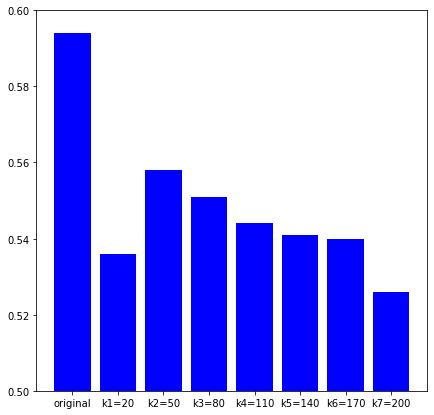

In [15]:
# visualise their performance using a bar graph.
plt.figure(figsize=(7,7))
plt.ylim(0.5,0.6)
name_list = ['original','k1=20','k2=50','k3=80','k4=110','k5=140','k6=170','k7=200']
num_list = [0.594, 0.536, 0.558, 0.551, 0.544, 0.541, 0.540, 0.526]
plt.bar(range(len(num_list)),num_list,color='b',tick_label=name_list)
plt.show()


In [16]:
# 2d Plot the ROC Curves in true positive rates vs false positive rates
y_original_pre = model_original.predict_proba(x_test_mat)
y_pre = []
for i in range(7):
    y_pre.append(model_k[i].predict_proba(x_test_pca[i]))

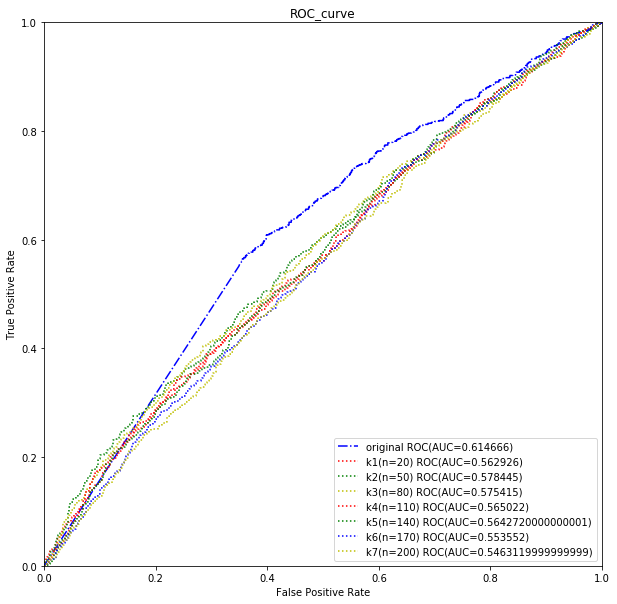

In [17]:
from sklearn.metrics import roc_curve  
from sklearn.metrics import auc 


y_original = y_original_pre[:,1]

fpr, tpr, thresholds = roc_curve(y_test_mat, y_original, pos_label=5) 
AUC = auc(fpr, tpr) 
fpr1, tpr1, thresholds1 = roc_curve(y_test_mat, y_pre[0][:,1], pos_label=5) 
AUC1 = auc(fpr1, tpr1) 
fpr2, tpr2, thresholds2 = roc_curve(y_test_mat, y_pre[1][:,1], pos_label=5) 
AUC2 = auc(fpr2, tpr2)
fpr3, tpr3, thresholds3 = roc_curve(y_test_mat, y_pre[2][:,1], pos_label=5) 
AUC3 = auc(fpr3, tpr3) 
fpr4, tpr4, thresholds4 = roc_curve(y_test_mat, y_pre[3][:,1], pos_label=5) 
AUC4 = auc(fpr4, tpr4)
fpr5, tpr5, thresholds5 = roc_curve(y_test_mat, y_pre[4][:,1], pos_label=5) 
AUC5 = auc(fpr5, tpr5)
fpr6, tpr6, thresholds6 = roc_curve(y_test_mat, y_pre[5][:,1], pos_label=5) 
AUC6 = auc(fpr6, tpr6) 
fpr7, tpr7, thresholds7 = roc_curve(y_test_mat, y_pre[6][:,1], pos_label=5) 
AUC7 = auc(fpr7, tpr7)


plt.figure(figsize=(10,10))
plt.plot(fpr,tpr,linestyle='-.',color='b',label = 'original ROC'+ '(AUC='+str(AUC)+')')  
plt.plot(fpr1,tpr1,linestyle=':',color='r',label = 'k1(n=20) ROC'+ '(AUC='+str(AUC1)+')')
plt.plot(fpr2,tpr2,linestyle=':',color='g',label = 'k2(n=50) ROC'+ '(AUC='+str(AUC2)+')')
plt.plot(fpr3,tpr3,linestyle=':',color='y',label = 'k3(n=80) ROC'+ '(AUC='+str(AUC3)+')')
plt.plot(fpr4,tpr4,linestyle=':',color='r',label = 'k4(n=110) ROC'+ '(AUC='+str(AUC4)+')')  
plt.plot(fpr5,tpr5,linestyle=':',color='g',label = 'k5(n=140) ROC'+ '(AUC='+str(AUC5)+')')
plt.plot(fpr6,tpr6,linestyle=':',color='b',label = 'k6(n=170) ROC'+ '(AUC='+str(AUC6)+')')
plt.plot(fpr7,tpr7,linestyle=':',color='y',label = 'k7(n=200) ROC'+ '(AUC='+str(AUC7)+')')  



plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC_curve' )  
plt.ylabel('True Positive Rate')  
plt.xlabel('False Positive Rate')  
plt.legend(loc = "lower right")
plt.show() 



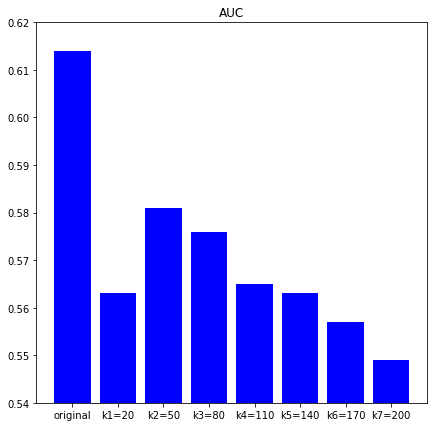

In [18]:
# 2e. Compute the area under the ROC curve values for the eight Naive Bayes classifiers and visualise using a bar graph.
plt.figure(figsize=(7,7))
plt.ylim(0.54,0.62)
name_list = ['original','k1=20','k2=50','k3=80','k4=110','k5=140','k6=170','k7=200']
num_list = [0.614, 0.563, 0.581, 0.576, 0.565, 0.563, 0.557, 0.549]
plt.bar(range(len(num_list)),num_list,color='b',tick_label=name_list)
plt.title('AUC' )
plt.show()


### Question 3: Noisy data and multiclass classification (6 marks)

#### Noisy **CatDog** subset.

3a. Repeat 2a, 2b, and 2c on the noisy version of CatDog subset. Show the bar graph and compare it with that in 2c above. 

#### Multiclass classification using the original CIFAR-10 dataset (all 10 classes)

3b. Apply PCA on the training set to reduce the dimensionality. You need to study at least **three** different values for the reduced dimensionality. Explain your choice.

3c. Train nine classifers: **four Naive Bayes** classifiers(one on the original features, and three on PCA features with three different dimensions in 3b); **four Logistic Regression** classifiers (one on the original features, and three on PCA features with three different dimensions in 3b); and one **Convoluational Neural Network** as defined in the [pytorch CIFAR10 tutorial](https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html).

3d. Evalaute the nine classifiers on the test set. Summarise the **classification accuracy**, **total training time**, and **total test time** using three bar graphs.

3e. Show the confusion matrix for these nine classifiers (see Lab 8 - 1.4).

3f. Describe **at least three** interesting observations from the evaluation results above. Each observation should have **3-5 sentences**. 

In [19]:
# Write the code for your answer here. You can use multiple cells to improve readability.
# 3a. Repeat 2a, 2b, and 2c on the noisy version of CatDog subset.
CatDog_noisy = []
for images,labels in Noisy_trainset:
    if labels == 3 or labels == 5:
        CatDog_noisy.append((images,labels))

CatDog_test_noisy = []
for images,labels in Noisy_testset:
    if labels == 3 or labels == 5:
        CatDog_test_noisy.append((images,labels))

In [20]:
x_train_noisy = []
y_train_noisy = []
for image,label in CatDog_noisy:
    image_np = image.numpy().reshape(3*32*32)
    x_train_noisy.append(image_np)
    y_train_noisy.append(label)

x_train_mat_noisy = np.array(x_train_noisy) #Get training set picture matrix
y_train_mat_noisy = np.array(y_train_noisy) #Get training set picture label matrix

In [21]:
# Applying PCA with k_values above,and store to list CatDog_train_pca
x_train_pca = []
for k in k_values:
    pca = PCA(n_components=k, whiten=True)
    x_pca = pca.fit_transform(x_train_mat_noisy)
    x_train_pca.append(x_pca)
pca_model = []
for i in range(7):
    pca = PCA(n_components = k_values[i],whiten = True).fit(x_train_mat_noisy)   
    pca_model.append(pca)

In [22]:
# 2b Train eight Naive Bayes Classifiers (NBC): one on the original features (raw pixels), 
#and seven on PCA features with seven different dimensions in 2a
# The classifier uses Gaussian instead of Multinomial， because Multinomial Classifiers Input X must be non-negative
from sklearn.naive_bayes import GaussianNB

model_original = GaussianNB()
model_original.fit(x_train_mat_noisy, y_train_mat_noisy)
model_k = []
for i in range(7):
    classifier = GaussianNB()
    classifier.fit(x_train_pca[i], y_train_mat_noisy)
    model_k.append(classifier)

In [23]:
# 2c Evalaute the eight Naive Bayes classifiers on the test set in terms of classification accuracy
x_test_noisy = []
y_test_noisy = []
for image,label in CatDog_test_noisy:
    image_np = image.numpy().reshape(3*32*32)
    x_test_noisy.append(image_np)
    y_test_noisy.append(label)

x_test_mat_noisy = np.array(x_test_noisy) #Get training set picture matrix
y_test_mat_noisy = np.array(y_test_noisy) #Get training set picture label matrix

In [24]:
# Applying PCA to reduced dimensionality.
x_test_pca = []
for i in range(7):
    x_test_ = pca_model[i].fit_transform(x_test_mat_noisy)
    x_test_pca.append(x_test_)

In [25]:
y_original_prob = model_original.score(x_test_mat_noisy, y_test_mat_noisy)
print(y_original_prob)

0.5875


In [26]:
y_prob = []
for i in range(7):
    y_prob.append(model_k[i].score(x_test_pca[i], y_test_mat_noisy))
print(y_prob)

[0.543, 0.549, 0.549, 0.548, 0.5395, 0.5325, 0.539]


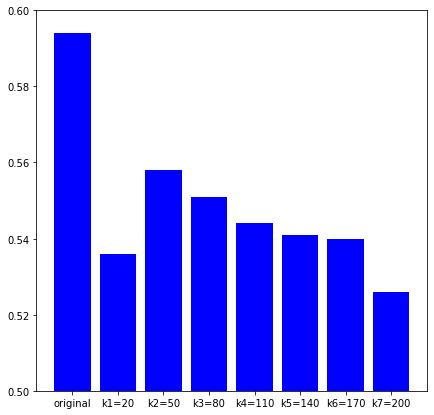

In [27]:
# visualise their performance using a bar graph.
plt.figure(figsize=(7,7))
plt.ylim(0.5,0.6)
name_list = ['original','k1=20','k2=50','k3=80','k4=110','k5=140','k6=170','k7=200']
num_list = [0.594, 0.536, 0.558, 0.551, 0.544, 0.541, 0.540, 0.526]
plt.bar(range(len(num_list)),num_list,color='b',tick_label=name_list)
plt.show()

In [28]:
# 3b. Apply PCA on the training set to reduce the dimensionality. You need to study at least three different values for the reduced dimensionality. 
x_all_train = []
y_all_train = []
for image,label in trainset:
    image_np = image.numpy().reshape(3*32*32)
    x_all_train.append(image_np)
    y_all_train.append(label)

x_all_train_mat = np.array(x_all_train) #Get training set picture matrix
y_all_train_mat = np.array(y_all_train) #Get training set picture label matrix



In [29]:
pca = PCA()
pca.fit_transform(x_all_train_mat)

# Calculating optimal k to have 95% (say) variance 
k = 0
current_sum = 0
total = sum(pca.explained_variance_)
while(current_sum / total < 0.95):
    current_sum += pca.explained_variance_[k]
    k += 1
print(k)

217


In [30]:
k_all_values = [50,100,200]

In [31]:
x_all_train_pca = []
for k in k_values:
    pca = PCA(n_components=k, whiten=True)
    x_pca = pca.fit_transform(x_all_train_mat)
    x_all_train_pca.append(x_pca)
pca_all_model = []
for i in range(3):
    pca = PCA(n_components = k_all_values[i],whiten = True).fit(x_all_train_mat)   
    pca_all_model.append(pca)

KeyboardInterrupt: 

In [ ]:
# 3c. Train nine classifers: 
#four Naive Bayes classifiers(one on the original features, and three on PCA features with three different dimensions in 3b); 
#four Logistic Regression classifiers (one on the original features, and three on PCA features with three different dimensions in 3b); 
#and one Convoluational Neural Network as defined in the pytorch CIFAR10 tutorial.

#four Naive Bayes classifiers
model_all_k = []
model_original = GaussianNB()
model_original.fit(x_all_train_mat, y_all_train_mat)
model_all_k.append(model_original)
for i in range(3):
    classifier = GaussianNB()
    classifier.fit(x_all_train_pca[i], y_all_train_mat)
    model_all_k.append(classifier)
    
#four Logistic Regression classifiers





### Question 4: Denoising Autoencoder (4 marks)

This question uses both the original and noisy CIFAR-10 datasets (all 10 classes).

Read about denoising autoencoder at [Wikepedia](https://en.wikipedia.org/wiki/Autoencoder#Denoising_autoencoder_(DAE)) and this [short introduction](https://towardsdatascience.com/denoising-autoencoders-explained-dbb82467fc2) or any other sources you like.

4a. Modify the autoencoder architecture in Lab 7 so that it takes colour images as input (i.e., 3 input channels). 

4b. **Training**: feed the **noisy training images** as input to the autoencoder in 4a; use a loss function that computes the reconstruction error between the **output of the autoencoder** and the respective **original images**.

4c. **Testing**: evaluate the autoencoder trained in 4b on the test datasets (feed noisy images in and compute reconstruction errors on original clean images. Find the **worstly denoised** 30 images (those with the largest reconstruction errors) in the test set and show them in pairs with the original images (60 images to show in total).

4d. Choose at least two hyperparameters to vary. Study **at least three different choices** for each hyperparameter. When varying one hyperparameter, all the other hyperparameters can be fixed. Visualise the performance sensitivity with respect to these hyperparameters.

4e. Describe **at least two** interesting observations from the evaluation results above. Each observation should have **3-5 sentences**. 

In [ ]:
# Write the code for your answer here. You can use multiple cells to improve readability.